In [1]:
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from time_series import (
    TimeSeriesAnalyser,
    get_col_arrays,
    JoinedDataframe
)

In [2]:
msft_ticker = yf.Ticker("MSFT")
msft_data = msft_ticker.history(interval="1d", period="1y")
msft_data.index = msft_data.index.tz_localize(None)
msft_analyser = TimeSeriesAnalyser(msft_data)
JoinedDataframe().add(msft_data["Open"].to_frame())

## Исходный временной ряд

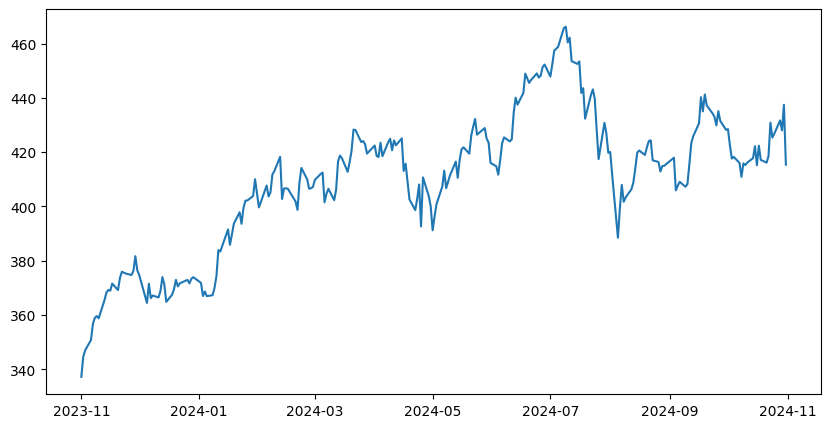

In [3]:
(dates, prices) = get_col_arrays(msft_data, col="Open")
fig = plt.figure(figsize=(10, 5))
plt.plot(dates, prices)

## Скользящее среднее

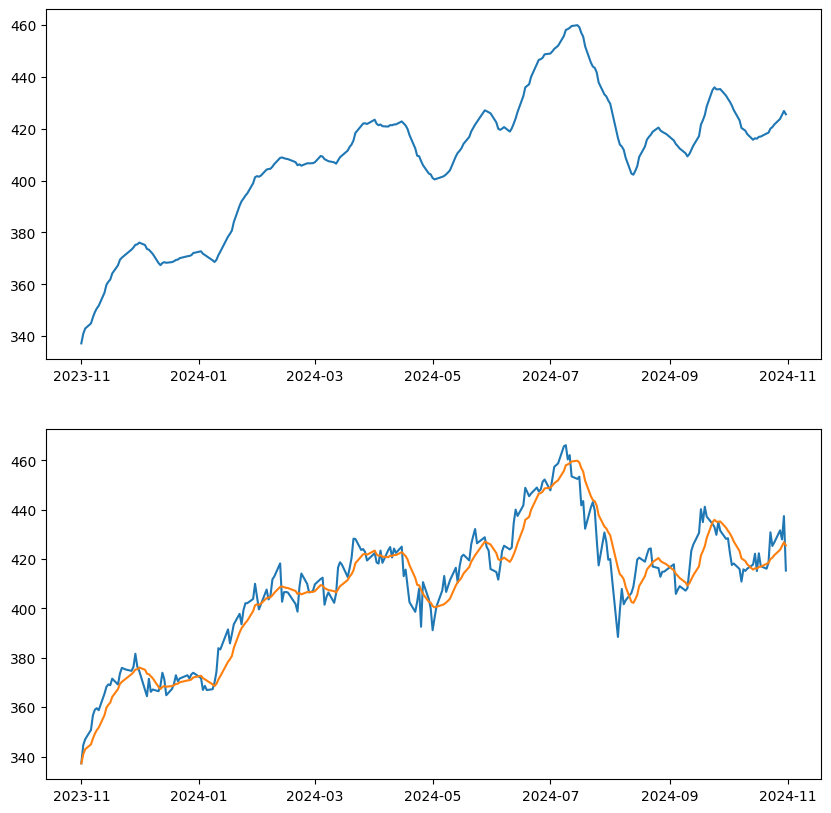

In [4]:
msft_movavg = msft_analyser.calc_movavg(datetime.timedelta(10), 
                                        join_cols=["Moving avg"])
(dates1, prices1) = get_col_arrays(msft_data, col="Open")
(dates2, prices2) = get_col_arrays(msft_movavg, col="Moving avg")
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.plot(dates2, prices2)
fig.add_subplot(2, 1, 2)
plt.plot(dates1, prices1)
plt.plot(dates2, prices2)

In [5]:
msft_analyser = TimeSeriesAnalyser(msft_movavg, interval=msft_analyser.interval)

## Экстремумы скользящего среднего

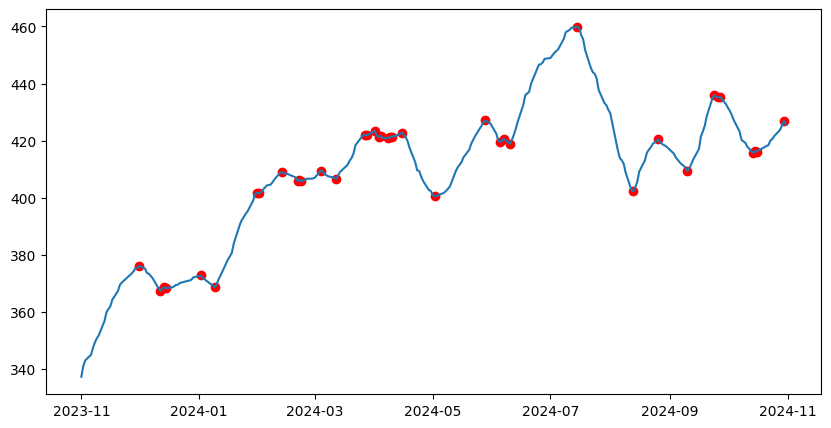

In [6]:
msft_extremes = msft_analyser.find_extremes(col="Moving avg", 
                                            join_cols=["Type"])
(dates1, prices1) = get_col_arrays(msft_extremes, col="Extreme")
(dates2, prices2) = get_col_arrays(msft_movavg, col="Moving avg")
fig = plt.figure(figsize=(10, 5))
plt.plot(dates2, prices2)
plt.scatter(dates1, prices1, c="r")

## Дифференциал скользящего среднего

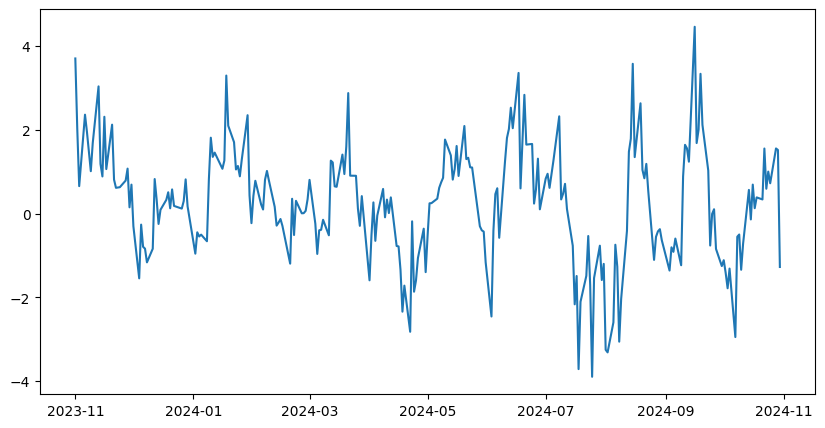

In [7]:
msft_diff = msft_analyser.differentiate(col="Moving avg", 
                                        join_cols=["Diff"])
(dates, prices) = get_col_arrays(msft_diff, col="Diff")
fig = plt.figure(figsize=(10, 5))
plt.plot(dates, prices)

## Авкорреляция скользящего среднего

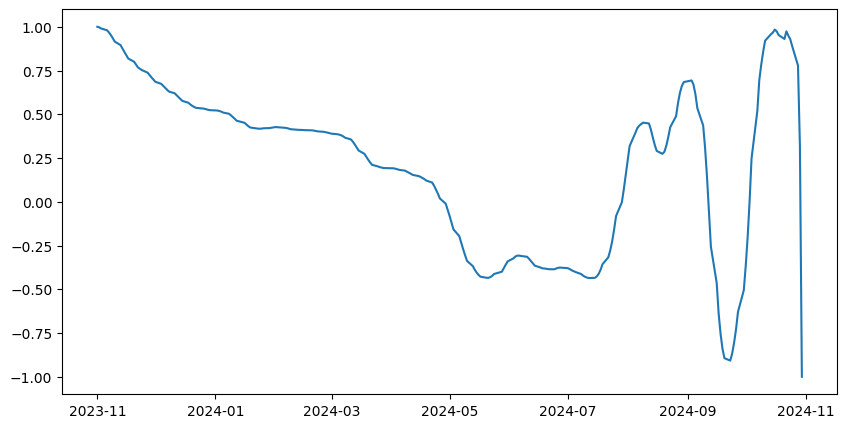

In [8]:
msft_autocor = msft_analyser.calc_autocor(col="Moving avg", 
                                          join_cols=["Autocor"])
(dates, prices) = get_col_arrays(msft_autocor, col="Autocor")
fig = plt.figure(figsize=(10, 5))
plt.plot(dates, prices)

In [9]:
JoinedDataframe().write(path="Results.xlsx")

In [13]:
yf.download("MSFT", start="2024-11-14", interval="1m")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-11-14 09:30:00-05:00,424.799988,426.540009,424.420013,426.260010,426.260010,2091508
2024-11-14 09:31:00-05:00,426.329895,428.000000,426.239990,427.748108,427.748108,120998
2024-11-14 09:32:00-05:00,427.610107,427.759888,426.450012,426.475006,426.475006,95358
2024-11-14 09:33:00-05:00,426.359985,426.619995,425.929993,426.130005,426.130005,77320
2024-11-14 09:34:00-05:00,426.130005,427.399994,426.130005,427.119995,427.119995,70073
...,...,...,...,...,...,...
2024-11-14 15:55:00-05:00,426.820007,427.290009,426.600006,426.790009,426.790009,108764
2024-11-14 15:56:00-05:00,426.809998,426.890015,426.609985,426.679993,426.679993,85036
2024-11-14 15:57:00-05:00,426.649994,427.130005,426.619995,426.970001,426.970001,97237
